Reading Restart Data
--

Restart data is apparently the same format as binary map output, just with
a single timestep of output.  This notebook tests this ability and
demonstrates a quick look at the data in a restart file.

At least on linux, it appears that the name of the restart file is often
corrupted, with some binary junk at the end. To work around this, the code
below uses `glob` to match on the first filename that looks like a restart
file.

Note that while the actual map output respects the set of variables requested
in the inp file (or via Scenario.map_output), the initial and restart files
include only state variables of the simulation and no derived quantities.

In [1]:
import stompy.model.delft.waq_scenario as dwaq
import glob
import matplotlib.pyplot as plt
import stompy.model.delft.io as dio
import os
from stompy.grid import unstructured_grid
%matplotlib inline

In [2]:
# Sneaky work around for corrupted restart filename
map_fn=glob.glob('run_agg141_lp_lsb_Kx25/*_res.map*')[0]

print("Corrupted restart filename: ",repr(map_fn))

In [6]:
# Annoying, but currently you have to load this directly.
hyd=dwaq.HydroFiles(hyd_path=os.path.join(os.path.dirname(map_fn),'com-waqmodel.hyd'))

In [21]:
# This could also be used to directly read the binary map output,
# or the waqmodel-initials.map
restart_data=dio.read_map(map_fn,hyd=hyd)
restart_data

<xarray.Dataset>
Dimensions:    (edge: 582, face: 141, layer: 10, maxnode_per_face: 15, node: 439, node_per_edge: 2, sub: 1, time: 1)
Coordinates:
  * sub        (sub) <U4 'dye1'
  * time       (time) datetime64[ns] 2012-10-20
Dimensions without coordinates: edge, face, layer, maxnode_per_face, node, node_per_edge
Data variables:
    t_sec      (time) int32 6912000
    dye1       (time, layer, face) float32 0.972185 0.798017 0.906867 ...
    mesh       int64 1
    node_x     (node) float64 5.836e+05 5.834e+05 5.844e+05 5.855e+05 ...
    node_y     (node) float64 4.147e+06 4.146e+06 4.146e+06 4.146e+06 ...
    face_node  (face, maxnode_per_face) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
    edge_node  (edge, node_per_edge) int32 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 ...
Attributes:
    header:   DWAQ                                    n/a                    ...

In [17]:
initials_data=dio.read_map('run_agg141_lp_lsb_Kx25/waqmodel-initials.map',hyd=hyd)
initials_data

<xarray.Dataset>
Dimensions:    (edge: 582, face: 141, layer: 10, maxnode_per_face: 15, node: 439, node_per_edge: 2, sub: 1, time: 1)
Coordinates:
  * sub        (sub) <U4 'dye1'
  * time       (time) datetime64[ns] 2012-08-01
Dimensions without coordinates: edge, face, layer, maxnode_per_face, node, node_per_edge
Data variables:
    t_sec      (time) int32 0
    dye1       (time, layer, face) float32 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 ...
    mesh       int64 1
    node_x     (node) float64 5.836e+05 5.834e+05 5.844e+05 5.855e+05 ...
    node_y     (node) float64 4.147e+06 4.146e+06 4.146e+06 4.146e+06 ...
    face_node  (face, maxnode_per_face) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
    edge_node  (edge, node_per_edge) int32 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 ...
Attributes:
    header:   Initial conditions file                 inactive substances are...

In [18]:
map_data=dio.read_map('run_agg141_lp_lsb_Kx25/waqmodel.map',hyd=hyd)
map_data

<xarray.Dataset>
Dimensions:     (edge: 582, face: 141, layer: 10, maxnode_per_face: 15, node: 439, node_per_edge: 2, sub: 4, time: 241)
Coordinates:
  * sub         (sub) <U10 'dye1' 'LocalDepth' 'SURF' 'TotalDepth'
  * time        (time) datetime64[ns] 2012-10-15 2012-10-15T00:30:00 ...
Dimensions without coordinates: edge, face, layer, maxnode_per_face, node, node_per_edge
Data variables:
    t_sec       (time) int32 6480000 6481800 6483600 6485400 6487200 6489000 ...
    dye1        (time, layer, face) float32 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 ...
    LocalDepth  (time, layer, face) float32 0.12693 0.498649 0.0726613 ...
    SURF        (time, layer, face) float32 8.7576e+06 1.74755e+06 ...
    TotalDepth  (time, layer, face) float32 1.27426 4.993 0.732601 1.97566 ...
    mesh        int64 1
    node_x      (node) float64 5.836e+05 5.834e+05 5.844e+05 5.855e+05 ...
    node_y      (node) float64 4.147e+06 4.146e+06 4.146e+06 4.146e+06 ...
    face_node   (face, maxnode_per_face) int3

In [19]:
# Grid information is added to restart, and a grid object
# can be built from either the restart Dataset or provided
# by the hydro:

# This works:
#g=unstructured_grid.UnstructuredGrid.from_ugrid(restart_data)

# read_dfm() does not work (likely bug).

# This works.
g=hyd.grid()

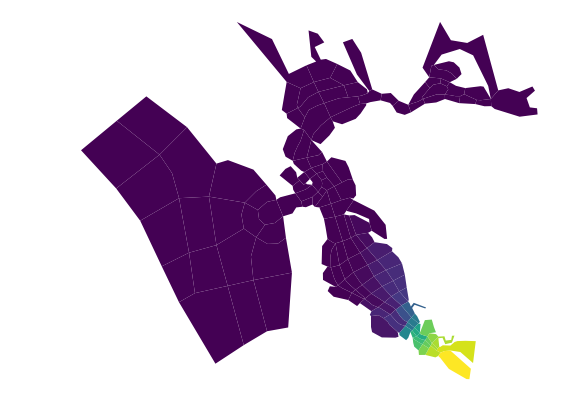

In [23]:
plt.figure(figsize=(9,7))
g.plot_cells(values=restart_data['dye1'].isel(time=0,layer=0))
plt.axis('equal')
plt.axis('off') ;